In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import cmcrameri.cm as cmc  #scientific color maps - perceptually uniform
from scipy import signal
from scipy.optimize import fsolve
from scipy.stats import norm
from sklearn.preprocessing import normalize
from scipy import constants
from matplotlib import rcParams
from scipy.optimize import fsolve
from joblib import Parallel, delayed
from sklearn.decomposition import PCA
from scipy.signal import sawtooth



In [2]:
# degine the U and r arrays. The length of U must be the same as that used to make the lookup file
U = np.arange(0, 1.5, 0.001)
r_all = np.arange(0, 0.3, 0.01)


In [3]:
# read the lookup numpy file
lookup = np.load('lookup.npy')
lookup.shape

(1500, 1500, 30)

In [4]:
# generate an arbitary spectrum by linearly mixing three gaussian peaks. Normalise the result
def gauss(WL, muWL, sigma):
    return np.exp(-(WL-muWL)**2/(2*sigma**2))

def spectrum(WL, muWLs, sigmas,As):
    val=np.zeros(len(WL))
    for i in range(len(muWLs)):
        val+= As[i]*gauss(WL, muWLs[i], sigmas[i])
        #plt.plot(WL, val, 'k')
    return val/np.max(val)


def spectrumPC(PCs, As):
    val=np.zeros(len(WL))
    for i in range(len(PCs.shape[1])):
        val+= As[i]*PCs[:,i]
        #plt.plot(WL, val, 'k')
    return val

# generate ground truth SEC from the parameters

def generate(WL, muWLsAll, sigmasAll, Bs, AsAll, U, U0s, rs, thetas): # not yet right needs also lookup and rs all
    # initalise arrays
    # initalise arrays
    thetas=np.zeros((len(rs),len(U)))

    observations=np.zeros((len(WL),len(U)))

    spectra=np.zeros((len(WL),len(muWLsAll[:])))

    for i in range(len(muWLsAll[:])):
        spectra[:,i]=Bs[i]*spectrum(WL, muWLsAll[i], sigmasAll[i],AsAll[i])
        evol=np.outer(spectra[:,i],thetas[i,:])+np.random.normal(0,0.0000,(len(WL),len(U)))
        observations+=evol
    return observations, thetas, spectra

def sawtooth2(time, amplitude, period, phase):
    """ This function generates a sawtooth wave with the following parameters:
    Once, fitted is used to generate an interpolation function from t-->V.
    time: time array
    amplitude: amplitude of the wave
    period: period of the wave
    phase: phase of the wave
    """
    return amplitude * sawtooth((2*np.pi  * time)/(period)-phase, 0.5)

0.6816901138162093

In [15]:
# generate a time array ranging from 0 to 240 in 0.01 steps
time = np.arange(0, 240, 0.01)

# generate a potential array using the sawtooth2 function with Ampl=1, period=80, phase=0
U = sawtooth2(time, 1, 80, 0)



# define the wavelength in 1 nm steps from 400 to 900 nm
WL=np.arange(400, 900, 1)


# define the standard potentials of the redox couples
U0s=np.array([0.6, 1, 1.3])

# define the interaction parameters of the redox couples
rs=np.array([0, 0.25, 0.15])



# define peak means which mix to estimate each component spectrum - these are arbitary fitting parameters
muWLs=np.array([450,600,800])
muWLs1=np.array([400,450,500])
muWLs2=np.array([700,750,800])

# generate a list of arrays of peak means
muWLsAll=[muWLs1, muWLs, muWLs2] 

# define peak widths of the gaussians  - these are arbitary fitting parameters
sigmas=np.array([60,100,150])
sigmas1=np.array([60,100,150])
sigmas2=np.array([60,100,150])

# generate a list of arrays of peak widths
sigmasAll=[sigmas1, sigmas, sigmas2]


# define the mixing coefficients for each gaussian arbitary  fitting parameters
As0=[1,2,3]
As1=[3,1,3]
As2=[1,1,1]

AsAll=[As0, As1, As2]
# define the scaling coefficients for pure spectrum - ***not arbitary**
Bs=np.array([0.02,0.05,0.08])



thetas=np.zeros((len(rs),len(U)))
spectra=np.zeros((len(WL),len(muWLsAll[:])))

print(thetas[0,:].shape)
print(spectra[:,1].shape)

np.outer(spectra[:,0],thetas[0,:]).shape

(24000,)
(500,)


(500, 24000)

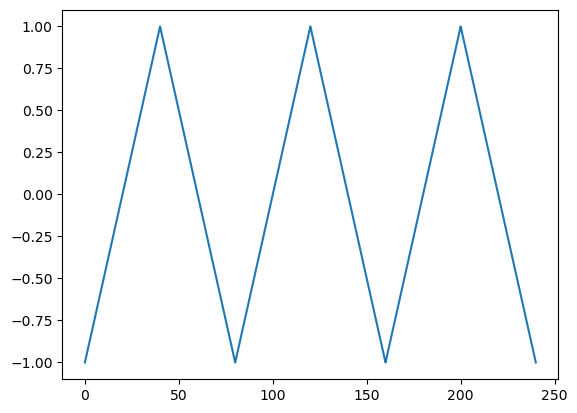

In [16]:
# plot U against time
plt.plot(time, U)


observations,thetas,spectra=generate(WL, muWLsAll, sigmasAll, Bs, AsAll, U, U0s, rs)


In [17]:
# plot each collumn of observations against wavelength
cmap = cmc.roma
colors=cmap(np.linspace(0,1,len(U)))
for i in range(len(U)):
    plt.plot(WL, observations[:,i],color=colors[i],alpha=0.8)

NameError: name 'observations' is not defined

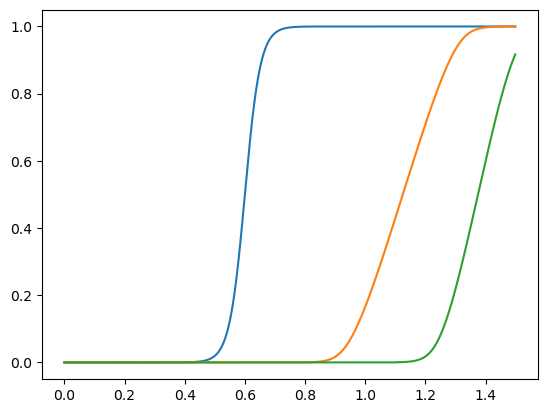

In [ ]:
# plot each row of thetas against U

for i in range(len(rs)):
    plt.plot(U, thetas[i,:])

(0.0, 1.1)

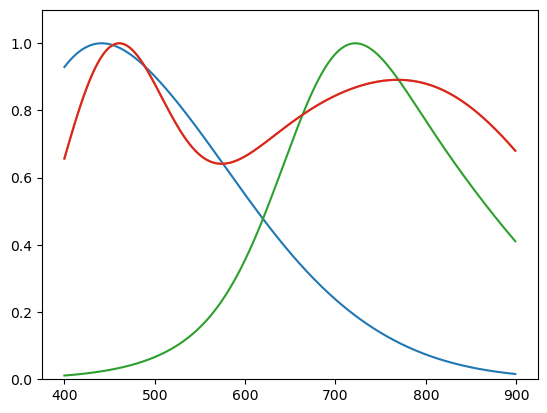

In [ ]:
# plot each collumn of spectra against wavelength
for i in range(len(muWLsAll[:])):
 plt.plot(WL, spectra[:,i]/np.max(spectra[:,i]))

plt.plot(WL, spectra[:,1]/np.max(spectra[:,1]))
# set y minimum to 0    
plt.ylim(0,1.1)

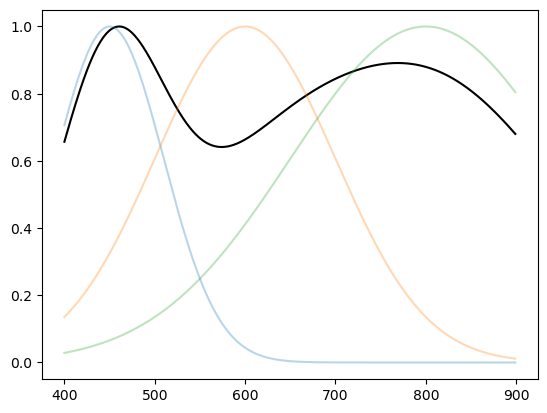

In [ ]:


# for each value in muWLs and sigmas run gauss(WL, muWL, sigma) and plot the result
plt.plot(WL, spectra[:,1]/np.max(spectra[:,1]), color='k')
for i in range(len(muWLs)):
    plt.plot(WL, gauss(WL, muWLs[i], sigmas[i]), alpha=0.3)


In [ ]:
def objective(observations,WL, muWLsAll_est, sigmasAll_est, Bs_est, AsAll_est, U, U0s_est, rs_est):
    return np.sum(np.square((observations-evaluate(WL, muWLsAll_est, sigmasAll_est, Bs_est, AsAll_est, U, U0s_est, rs_est)[0])))

In [ ]:
def objectivePC(observations,PCs, Bs_est, AsAll_est, U, U0s_est, rs_est):
    return np.sum(np.square((observations-evaluatePC(PCs, Bs_est, AsAll_est, U, U0s_est, rs_est)[0])))

In [ ]:

objectivePC(observations,PCs, Bs, AsAll, U, U0s, rs)

TypeError: object of type 'int' has no len()

In [ ]:
mu1G = list(np.arange(400, 601, 10, dtype=int))
type(mu1G[0])


numpy.int64

In [ ]:
# use skopt.gp_minimize to find the best fit parameters
from skopt import gp_minimize
from skopt import gbrt_minimize
from skopt import forest_minimize
from skopt import dummy_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
from skopt.plots import plot_objective

grid_points = list(range(400, 601, 10))


# generate the three peak mean grids and the one peak width grid

mu1G = list(np.arange(410, 610, 20))
mu2G = list(np.arange(600, 760, 20))
mu3G = list(np.arange(750, 910, 20))
sigG = list(np.arange(50, 150, 20))
BsG = list(np.arange(0.01, 0.1, 0.01))
rG = list(np.arange(0, 0.3, 0.01))
AsG = list(np.arange(0.001, 1, 0.05))
U0sG = list(np.arange(0.5, 2, 0.01))

# define the search space
space  = [Categorical(mu1G, name='muWLs1_1'), Categorical(mu2G, name='muWLs1_2'), Categorical(mu3G, name='muWLs1_3'),
          Categorical(mu1G, name='muWLs2_1'), Categorical(mu2G, name='muWLs2_2'), Categorical(mu3G, name='muWLs2_3'),
          Categorical(mu1G, name='muWLs3_1'), Categorical(mu2G, name='muWLs3_2'), Categorical(mu3G, name='muWLs3_3'),
          Categorical(sigG, name='sigmas1_1'), Categorical(sigG, name='sigmas1_2'), Categorical(sigG, name='sigmas1_3'),
          Categorical(sigG, name='sigmas2_1'), Categorical(sigG, name='sigmas2_2'), Categorical(sigG, name='sigmas2_3'),
          Categorical(sigG, name='sigmas3_1'), Categorical(sigG, name='sigmas3_2'), Categorical(sigG, name='sigmas3_3'),
          Categorical(BsG, name='Bs1'), Categorical(BsG, name='Bs2'), Categorical(BsG, name='Bs3'),
          Categorical(rG, name='rs1'), Categorical(rG, name='rs2'), Categorical(rG, name='rs3'),
          Categorical(AsG, name='As1_1'), Categorical(AsG, name='As1_2'), Categorical(AsG, name='As1_3'),
          Categorical(AsG, name='As2_1'), Categorical(AsG, name='As2_2'), Categorical(AsG, name='As2_3'),
          Categorical(AsG, name='As3_1'), Categorical(AsG, name='As3_2'), Categorical(AsG, name='As3_3'),
          Categorical(U0sG, name='U0s1'), Categorical(U0sG, name='U0s2'), Categorical(U0sG, name='U0s3')]

# define the objective function
@use_named_args(space)
def objective_function(**params):
    muWLsAll_est=[[params['muWLs1_1'],params['muWLs1_2'],params['muWLs1_3']],
                  [params['muWLs2_1'],params['muWLs2_2'],params['muWLs2_3']],
                  [params['muWLs3_1'],params['muWLs3_2'],params['muWLs3_3']]]
    
    sigmasAll_est=[[params['sigmas1_1'],params['sigmas1_2'],params['sigmas1_3']],
                  [params['sigmas2_1'],params['sigmas2_2'],params['sigmas2_3']],
                  [params['sigmas3_1'],params['sigmas3_2'],params['sigmas3_3']]]
    
    AsAll_est=[[params['As1_1'],params['As1_2'],params['As1_3']],
                  [params['As2_1'],params['As2_2'],params['As2_3']],
                  [params['As3_1'],params['As3_2'],params['As3_3']]]
    
    U0s_est=[params['U0s1'],params['U0s2'],params['U0s3']]

    rs_est=[params['rs1'],params['rs2'],params['rs3']]

    Bs_est=[params['Bs1'],params['Bs2'],params['Bs3']]
    return objective(observations,WL, muWLsAll_est, sigmasAll_est, Bs_est, AsAll_est, U, U0s_est, rs_est)



In [ ]:
# calculate the number of points
np.log10(len(mu1G)*len(mu2G)*len(mu3G)*len(sigG)*len(BsG)*len(rG)*len(AsG)*len(U0sG))

# average number of points
np.mean([len(mu1G),len(mu2G),len(mu3G),len(sigG),len(BsG),len(rG),len(AsG),len(U0sG)])

30.0

In [ ]:
# run the optimisation 
np.int = int
res = gp_minimize(objective_function, space, n_calls=10, random_state=0,verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0049
Function value obtained: 782.1941
Current minimum: 782.1941
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0048
Function value obtained: 421.5631
Current minimum: 421.5631
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0044
Function value obtained: 532.1724
Current minimum: 421.5631
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0041
Function value obtained: 277.9092
Current minimum: 277.9092
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: 652.1513
Current minimum: 277.9092
Iteration No: 6

In [ ]:
#from sklearn.ensemble import ExtraTreesRegressor

#res1 = forest_minimize(objective_function, space, base_estimator='ET', n_calls=100, random_state=1)

In [ ]:
res2 = dummy_minimize(objective_function, space, n_calls=50, random_state=0,verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0070
Function value obtained: 782.1941
Current minimum: 782.1941
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0061
Function value obtained: 421.5631
Current minimum: 421.5631
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0062
Function value obtained: 532.1724
Current minimum: 421.5631
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0060
Function value obtained: 277.9092
Current minimum: 277.9092
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0048
Function value obtained: 652.1513
Current minimum: 277.9092
Iteration No: 6

In [ ]:
res3 = gbrt_minimize(objective_function, space, n_calls=10, random_state=0,verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0068
Function value obtained: 471.3765
Current minimum: 471.3765
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0058
Function value obtained: 234.5082
Current minimum: 234.5082
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0055
Function value obtained: 433.5212
Current minimum: 234.5082
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0053
Function value obtained: 356.7181
Current minimum: 234.5082
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0053
Function value obtained: 493.9603
Current minimum: 234.5082
Iteration No: 6

In [ ]:
res2.x[36-18:36-18+3]

[0.08, 0.03, 0.02]

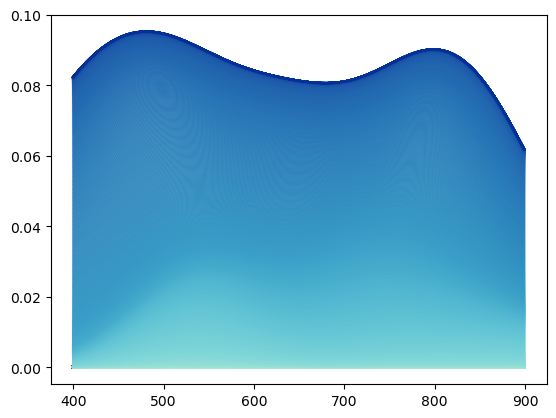

In [ ]:
# extract the values of res.x and reconstruct all the parameters needed to input into the generate function
def reconstruct(res):
    muWLsAll_recon=[[res.x[0],res.x[1],res.x[2]],
                [res.x[3],res.x[4],res.x[5]],
                [res.x[6],res.x[7],res.x[8]]]

    sigmasAll_recon=[[res.x[9],res.x[10],res.x[11]],
                [res.x[12],res.x[13],res.x[14]],
                [res.x[15],res.x[16],res.x[17]]]

    bs_recon=[res.x[18],res.x[19],res.x[20]]

    rs_recon=[res.x[21],res.x[22],res.x[23]]


    AsAll_recon=[[res.x[24],res.x[25],res.x[26]],
                [res.x[27],res.x[28],res.x[29]],
                [res.x[30],res.x[31],res.x[32]]]

    U0s_recon=[res.x[33],res.x[34],res.x[35]]


    observations_recon,thetas_recon,spectra_recon = generate(WL, muWLsAll_recon, sigmasAll_recon, bs_recon, AsAll_recon, U, U0s_recon, rs_recon)
    return observations_recon,thetas_recon,spectra_recon 

observations_recon,thetas_recon,spectra_recon = reconstruct(res2)
# generate the reconstructed observations

# plot the reconstructed observations against wavelength
cmap = cmc.roma
colors=cmap(np.linspace(0,1,len(U)))
for i in range(len(U)):
    plt.plot(WL, observations_recon[:,i],color=colors[i],alpha=0.8)





In [ ]:
# extract the values of res.x and reconstruct all the parameters needed to input into the generate function
def residual_check(res):
    muWLsAll_recon=[[res.x[0],res.x[1],res.x[2]],
                [res.x[3],res.x[4],res.x[5]],
                [res.x[6],res.x[7],res.x[8]]]

    sigmasAll_recon=[[res.x[9],res.x[10],res.x[11]],
                [res.x[12],res.x[13],res.x[14]],
                [res.x[15],res.x[16],res.x[17]]]

    bs_recon=[res.x[18],res.x[19],res.x[20]]

    rs_recon=[res.x[21],res.x[22],res.x[23]]


    AsAll_recon=[[res.x[24],res.x[25],res.x[26]],
                [res.x[27],res.x[28],res.x[29]],
                [res.x[30],res.x[31],res.x[32]]]

    U0s_recon=[res.x[33],res.x[34],res.x[35]]


    obj = objective(observations, WL, muWLsAll_recon, sigmasAll_recon, bs_recon, AsAll_recon, U, U0s_recon, rs_recon)
    return obj, muWLsAll_recon, sigmasAll_recon, bs_recon, rs_recon, AsAll_recon, U0s_recon

values=residual_check(res2)
obj=values[0]
muWLsAll_recon=values[1]
sigmasAll_recon=values[2]
bs_recon=values[3]
rs_recon=values[4]
AsAll_recon=values[5]
U0s_recon=values[6]

#print(residual_check(res2))




(0.4, 1.6)

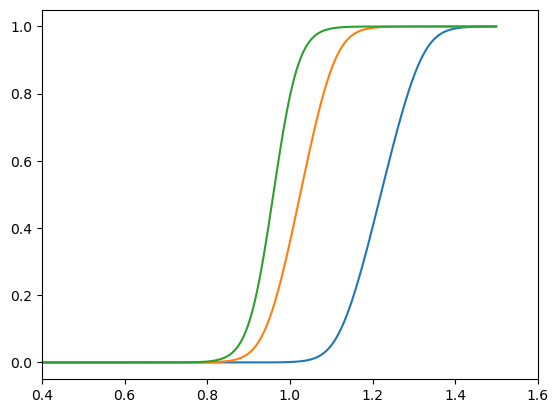

In [ ]:
# plot the reconstructed thetas against U
for i in range(len(rs_recon)):
    plt.plot(U, thetas_recon[i,:])
# scale x minimum from 0.4 and maximum to 1.6
plt.xlim(0.4,1.6)

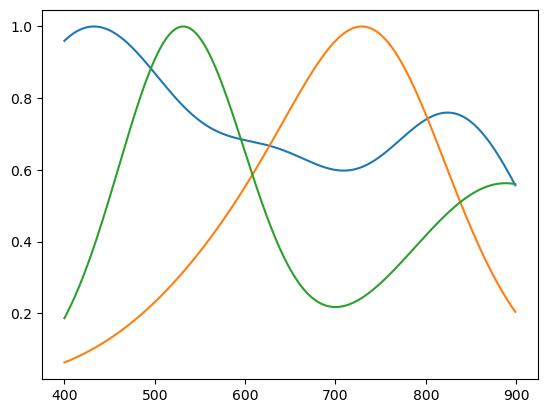

In [ ]:
# plot spectra recon against wavelength
for i in range(len(muWLsAll_recon[:])):
 plt.plot(WL, spectra_recon[:,i]/np.max(spectra_recon[:,i]))

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

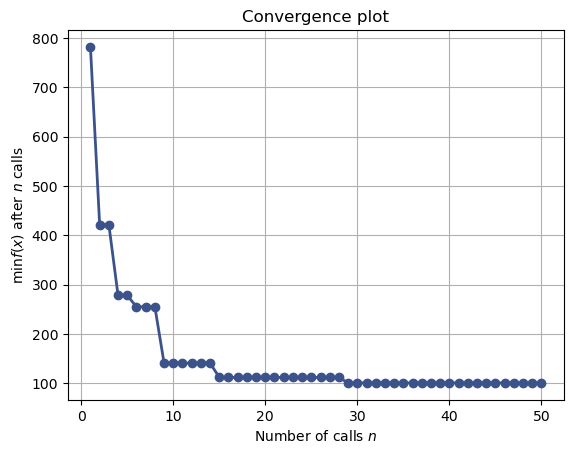

In [ ]:
from skopt.plots import plot_convergence
plot_convergence(res2)

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

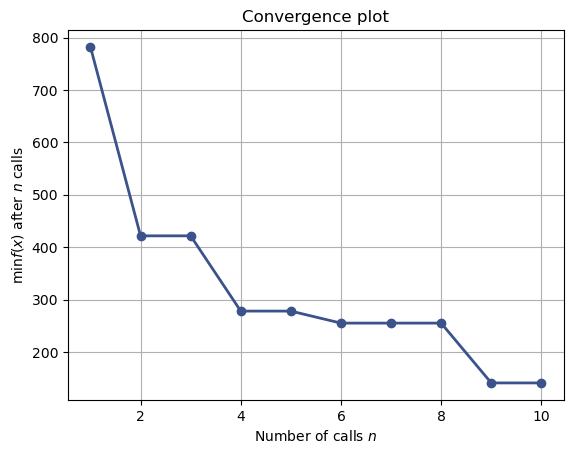

In [ ]:
from skopt.plots import plot_convergence
plot_convergence(res)